In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
us_com= pd.read_csv('C:\\Users\\Ankita\Downloads\\UScomments.csv',error_bad_lines=False)
us_com.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
c:\users\ankita\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


# Sentiment Analysis

In [3]:
#!pip install textblob

In [4]:
from textblob import TextBlob

In [5]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [6]:
polarity=[]
for i in us_com['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [7]:
us_com['polarity']=polarity

In [8]:
us_com.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


**Positive Sentiments**

In [9]:
#!pip install wordcloud

In [29]:
pos_com = us_com[us_com['polarity']>0] #You can also check for purely posistive sentiments by, pos_com = us_com[us_com['polarity']==1]
pos_com

,video_id,comment_text,likes,replies,polarity
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
11,XpVt6Z1Gjjo,"Dear Logan, I really wanna get your Merch but ...",0,0,0.200000
13,XpVt6Z1Gjjo,Casey is still better then logan,0,0,0.500000
15,XpVt6Z1Gjjo,He happy cause he in a movie,0,0,0.800000
18,XpVt6Z1Gjjo,It's been fun watching you grow. I'm at 42 day...,3,0,0.250000
...,...,...,...,...,...
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.000000
691389,EoejGgUNmVU,excellent performance,0,0,1.000000
691390,EoejGgUNmVU,"Zajebistaa...jak zawsze,live super.",0,0,0.333333
691391,EoejGgUNmVU,Love you,0,0,0.500000


In [30]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
total_com = (" ".join(pos_com['comment_text']))
len(total_com)

33819311

(-0.5, 999.5, 499.5, -0.5)

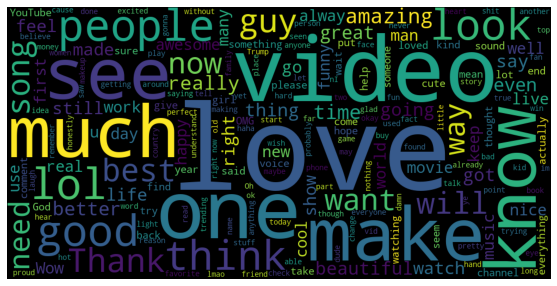

In [32]:
wordcloud = WordCloud(width=1000, height=500,stopwords= set(STOPWORDS)).generate(total_com)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

**Negative Sentiments**

In [18]:
neg_com = us_com[us_com['polarity']<0] ##You can also check for purely negative sentiments by, neg_com = us_com[us_com['polarity']==-1]
neg_com

,video_id,comment_text,likes,replies,polarity
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714
12,XpVt6Z1Gjjo,Honestly Evan is so annoying. Like its not fun...,0,0,-0.023333
16,XpVt6Z1Gjjo,Ayyyyoooo Logang what up . This was a hard vl...,1,0,-0.291667
19,XpVt6Z1Gjjo,Made a lot of people hate youtube - GJ,0,0,-0.800000
28,XpVt6Z1Gjjo,Evan is a horrible human being he also looks s...,0,0,-0.050000
...,...,...,...,...,...
691297,qRoVlH1OcI4,Fuck trump hes honestly such a fucking idiot,0,5,-0.400000
691298,qRoVlH1OcI4,Fuck Donald trump he is a piece of shit presid...,0,2,-0.085714
691316,EoejGgUNmVU,"LP, U look exhausted (i think); I was afraid o...",0,0,-0.066667
691319,EoejGgUNmVU,What do you do in your past life to end up bet...,0,0,-0.250000


In [19]:
total_neg_com = (" ".join(neg_com['comment_text']))
len(total_neg_com)

12091301

(-0.5, 999.5, 499.5, -0.5)

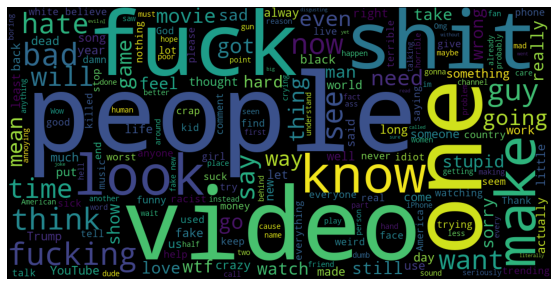

In [20]:
wordcloud = WordCloud(width=1000, height=500,stopwords= set(STOPWORDS)).generate(total_neg_com)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')